# **Linear Regression**

#### **What is Linear Regression:**

Linear regression is used to model the relationship between a dependent variable and one or more independent variables.

#### **Why use Linear Rgression:**

Linear regression is a statistical method that models the relationship between a dependent variable (often called the target or outcome variable) and one or more independent variables (also called predictors or features).

There are two main types:

- Simple Linear Regression: Involves one independent variable.
- Multiple Linear Regression: Involves multiple independent variables.

#### **How to implement Linear Regression:**

- First section will go through how to implement a simple linear regression.
- Second section will generalize for multiple linear regression.


In [68]:
# import the necessary pkgs:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

## **Simple Linear Regression**

$$f_{w,b}(x^{(i)}) = wx^{(i)} + b \tag{1}$$

- $x$ is known as feature.
- $y$ is known as taeget.
- $i$ stands for the $i^{(th)}$ training sample.
- $w$ is the inclination of the line.
- $b$ is the bias.

In [69]:
# step 1: load the data set

# set the seed for reproducibility
np.random.seed(42)

# feature
x = np.random.rand(100, 1) * 10

# target + noise
y = x + np.random.rand(100, 1) * 10

data = pd.DataFrame(data=np.hstack((x, y)), columns=['x', 'y'])
data.head()

,x,y
0,3.745401,4.059693
1,9.507143,15.871247
2,7.319939,10.463499
3,5.986585,11.072292
4,1.560186,10.635851


In [65]:
def compute_model_output(x, w, b):
    """
    Computes the prediction of a linear model
    Args:
      x (ndarray (m,)): Data, m examples 
      w,b (scalar)    : model parameters  
    Returns
      f_wb (ndarray (m,)): model prediction
    """
    m = x.shape[0]
    f_wb = np.zeros(m)
    for i in range(m):
        f_wb[i] = w * x[i] + b
        
    return f_wb

/var/folders/tx/46dc5xbj76dgdg729dqvc4dr0000gn/T/ipykernel_45626/900437179.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  f_wb[i] = w * x[i] + b


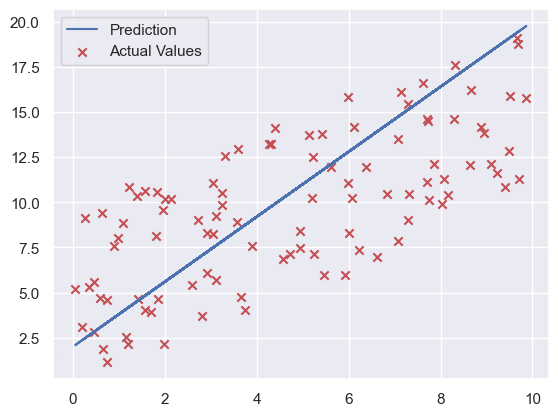

In [79]:
w = 1.8
b = 2

tmp_f_wb = compute_model_output(x, w, b,)

# Plot our model prediction
plt.plot(x, tmp_f_wb, c='b',label='Prediction')

# Plot the data points
plt.scatter(x, y, marker='x', c='r',label='Actual Values')

plt.legend()
plt.show()

### **Cost Function:**

$$J(w,b) = \frac{1}{2m} \sum_{i=0}^{m-1}(f_{w,b}(x^{(i)}) - y^{(i)})^2 \tag{2}$$

#### **Algorithm**
1. initialize the number of samples and the cost.
2. loop through the number of samples updating:
    - simple linear regression function.
    - cost function.
3. return the total cost.

In [80]:
def compute_cost(x,y,w,b):
    """
    This function implement the cost function for gradient descent.
    Args:
        x (ndarray (m,)): m data examples
        y (ndarray (m,)): m target values
        w,b (scalar)    : model parameters               
    Returns:
        total_cost: the total cost
    """
    m = x.shape[0]
    cost = 0

    for i in range(m):
        f_wb = w * x[i] + b
        cost = cost + (f_wb - y[i])**2
    total_cost = 1 / (2 * m) * cost
    
    return total_cost    

### **Gradient Function:**

\begin{align}
\frac{\partial J(w,b)}{\partial w}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})x^{(i)} \tag{4}\\
  \frac{\partial J(w,b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)}) \tag{5}\\
\end{align}

Conventions:
- The naming of python variables containing partial derivatives follows this pattern,$\frac{\partial J(w,b)}{\partial b}$  will be `dj_db`.
- w.r.t is With Respect To, as in partial derivative of $J(wb)$ With Respect To $b$.

#### **Algorithm**
1. initialize the number of samples and the $\frac{\partial J(w,b)}{\partial w}$,$\frac{\partial J(w,b)}{\partial b}$.
2. loop through the number of samples updating:
    - simple linear regression function.
    - oartial derivatives in respect to w and b.
3. return the two gradient relative to w and b.

In [81]:
def compute_gradient(x,y,w,b):
    """
    Computes the gradient for linear regression 
    Args:
      x (ndarray (m,)): Data, m examples 
      y (ndarray (m,)): target values
      w,b (scalar)    : model parameters
    Returns
      dj_dw (scalar): The gradient of the cost w.r.t. the parameters w
      dj_db (scalar): The gradient of the cost w.r.t. the parameter b
    """
    m = x.shape[0]
    dj_dw = 0
    dj_db = 0

    for i in range(m):
        f_wb = w * x[i] + b
        dj_dw_i = (f_wb - y[i]) * x[i]
        dj_db_i = (f_wb - y[i])
        dj_dw += dj_dw_i
        dj_db += dj_db_i
    dj_dw = (1 / m) * dj_dw
    dj_db = (1 / m) * dj_db
        
    return dj_dw, dj_db